> ## **Métodos Computacionales II - Taller #4**

**Hecho por:** Thomas Andrade Hernández (202214695) & Juan Carlos Rojas V. (202214037)

---

In [29]:
# Zona de librerías:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
import random as rnd
import math as math
import scipy as sci
import sympy as sym

---

**1. Integrador de Beeman 1976:** Lea y realice los pasos intermedios del integrador de Beeman: *Some multisteps methods for use in molecular dynamics calculations*:

$$\mathbf{r}_{n + 1} = \mathbf{r}_{n} + h\mathbf{v}_{n} + \frac{h^{2}}{6} \cdot \left(4\mathbf{a}_{n} - \mathbf{a}_{n - 1}\right)$$
$$\mathbf{r}_{n + 1} = \mathbf{r}_{n} + h\mathbf{v}_{n} + \frac{h^{2}}{6} \cdot \left(\mathbf{a}_{n + 1} + 2\mathbf{a}_{n}\right)$$
$$h\mathbf{v}_{n + 1} = \mathbf{r}_{n + 1} - \mathbf{r}_{n} + \frac{h^{2}}{6} \cdot \left(2\mathbf{a}_{n + 1} + \mathbf{a}_{n}\right)$$

La primera se refiere al algoritmo predictor y la segunda y tercera a los correctores. *Hint:* El articulo tiene un error en la ecuación $(9a)$, $(9b)$, $(9c)$. Identifique el error y realice los cálculos como sugiere el autor.

---

Tal y como menciona el autor del artículo, el integrador de Beeman toma una gran parte de sus bases del algoritmo del Verlet, del que es preciso apoyarse para encontrar las ecuaciones de este método. Para ello considerense las ecuaciones del algoritmo de Verlet:

$$x_{n + 1} = 2x_{n} - x_{n - 1} + a_{n}h^{2} \quad \text{ y } \quad v_{n} = \frac{x_{n + 1} - x_{n - 1}}{2h}$$

donde $h$ es el paso de integración. Lo primero que haremos será el considerar la expansión de Taylor de tercer orden de la posición $x(t + \Delta t)$:

$$x(t + \Delta{t}) = x(t) + v(t)\Delta{t} + \frac{a(t)\Delta{t}^{2}}{2} + \frac{j(t)\Delta{t}^{3}}{6} + \mathbf{O}(h^{4})$$

El jerk puede calcularse a partir de la expresión de la velocidad del método de verlet:

$$j(t) = \ddot{v}(t) = \frac{a(t + \Delta{t}) - a(t - \Delta{t})}{2\Delta{t}}$$

Ahora, para escribir el valor $a(t - \Delta{t})$ en términos de los otros dos adyacentes es posible insertar esta expresión del jerk en la expansión de Taylor de segundo orden para la aceleración:

$$a(t + \Delta{t}) = a(t) + j(t)\Delta{t} = a(t) + \frac{a(t + \Delta{t}) - a(t - \Delta{t})}{2}$$

Por lo anterior:

$$a(t + \Delta{t}) = 2a(t) - a(t - \Delta{t}) \quad \text{ y } \quad a(t - \Delta{t}) = 2a(t) - a(t + \Delta{t})$$

Introduciendo la información obtenida en la expansión de Taylor de la posición se logra obtener:

$$x(t + \Delta{t}) \approx x(t) + v(t)\Delta{t} + \frac{a(t)\Delta{t}^{2}}{2} + \frac{a(t + \Delta{t}) - a(t - \Delta{t})}{12}\Delta{t}^{2}$$

Para la primer ecuación se tiene:

$$x(t + \Delta{t}) \approx x(t) + v(t)\Delta{t} + \frac{a(t)\Delta{t}^{2}}{2} + \frac{2a(t) - a(t - \Delta{t}) - a(t - \Delta{t})}{12}\Delta{t}^{2}$$

$$\approx x(t) + v(t)\Delta{t} + \frac{4a(t)\Delta{t}^{2}}{6} - \frac{a(t - \Delta{t})\Delta{t}^{2}}{6}$$

$$\approx x(t) + v(t)\Delta{t} + \frac{\Delta{t}^{2}}{6}\cdot\left(4a(t) - a(t - \Delta{t})\right) \quad \text{Discretizando:} \quad x_{n + 1} \approx x_{n} + v_{n}h + \frac{h^{2}}{6}\left(4a_{n} - a_{n - 1}\right)$$

En el caso de la segunda ecuación se obtiene:

$$x(t + \Delta{t}) \approx x(t) + v(t)\Delta{t} + \frac{a(t)\Delta{t}^{2}}{2} + \frac{a(t + \Delta{t}) - 2a(t) + a(t + \Delta{t})}{12}\Delta{t}^{2}$$

$$\approx x(t) + v(t)\Delta{t} + \frac{2a(t)\Delta{t}^{2}}{6} + \frac{a(t + \Delta{t})}{6}\Delta{t}^{2}$$

$$\approx x(t) + v(t)\Delta{t} + \frac{\Delta{t}^{2}}{6}\cdot\left(a(t + \Delta{t}) + 2a(t)\right) \quad \text{Discretizando:} \quad x_{n + 1} \approx x_{n} + v_{n}h + \frac{h^{2}}{6}\left(a_{n + 1} + 2a_{n}\right)$$

Por último, para conseguir el resultado asociado a la velocidad se asumirá que los resultados de la posición $n + 1$ para Verlet y la primera ecuación de Beeman son los mismos, lo que da como resultado:

$$2x_{n} - x_{n - 1} + a_{n}h^{2} = x_{n} + v_{n}h + \frac{h^{2}}{6}\left(4a_{n} - a_{n - 1}\right)$$

$$v_{n}h = x_{n} - x_{n - 1} + a_{n}h^{2} - \frac{2a_{n}}{3}h^{2} + \frac{a_{n - 1}}{6}h^{2} = x_{n} - x_{n - 1} + \frac{a_{n}}{3}h^{2} + \frac{a_{n - 1}}{6}h^{2}$$

Obteniendo así:

$$v_{n}h = x_{n} - x_{n - 1} + \frac{h^{2}}{6}\left(2a_{n} + a_{n - 1}\right)$$

Ecuación análoga a la tercera del método de integración de Beeman dada la recurrencia misma de la relación.

---

**2. Integrador de Adams-Bashford:** Demuestre la formula de iteración para tres y cuatro puntos.

$$y_{n + 1} = y_{n} + \frac{h}{12} \cdot \left(23f_{n} - 16f_{n - 1} + 5f_{n - 2}\right)$$
$$y_{n + 1} = y_{n} + \frac{h}{24} \cdot \left(55f_{n} - 59f_{n - 1} + 37f_{n - 2} - 9f_{n - 3} \right)$$

*Hint:* Para el primer caso, integrar el polinomio interpolador para los puntos:

$$\Omega = \left\{(t_{n - 2}, f_{n - 2}), \ (t_{n - 1}, f_{n - 1}), \ (t_{n}, f_{n})\right\}$$

---

Dado el conjunto soporte aportado por un método Runge-Kutta, se consigue el conjunto soporte 
$$\Omega = \{ (t_{n-2},f_{n-2}),(t_{n-1},f_{n-1}),(t_n,f_n)\}$$

Con el cual se puede obtener un polinomio interpolador de Lagrange dado por 

$$p(t) = \frac{(t - t_{n-1})(t-t_n)}{(t_{n-2}-t_{n-1})(t_{n-2}-t_{n})}f_{n-2} + \frac{(t - t_{n-2})(t-t_n)}{(t_{n-1}-t_{n-2})(t_{n-1}-t_{n})}f_{n-1} + \frac{(t - t_{n-2})(t-t_{n-1})}{(t_{n}-t_{n-2})(t_{n}-t_{n-1})}f_{n}$$

Defínase la relación $h = t_{k+1} - t_{k}$, entonces 

$$p(t) = \frac{(t - t_{n-1})(t-t_n)}{2h^2}f_{n-2} - \frac{(t - t_{n-2})(t-t_n)}{h^2}f_{n-1} + \frac{(t - t_{n-2})(t-t_{n-1})}{2h^2}f_{n}$$

Defínase $t = t_n + h'$ entonces

$$p(h) = \frac{(h + h')(h')}{2h^2}f_{n-2} - \frac{(2h +h')(h')}{h^2}f_{n-1} + \frac{(2h + h')(h+h')}{2h^2}f_{n}$$

Por lo que si se toma la integral 

$$y_{n+1} - y_{n} = \int_{0}^{h} \frac{(h + h')(h')}{2h^2}f_{n-2} - \frac{(2h +h')(h')}{h^2}f_{n-1} + \frac{(2h + h')(h+h')}{2h^2}f_{n} \text{d}h'$$

Dado que me da extremada pereza hacer esa integral a mano, la hará Python. :D

In [30]:
fn,fn1,fn2,h,hp = sym.symbols("f_n f_{n-1} f_{n-2} h h'")
integrando1 = (h+hp)*hp/(2*h**2)*fn2 - (2*h+hp)*hp/(h**2)*fn1 + (2*h + hp)*(h + hp)/(2*h**2)*fn 
integrando1

f_n*(h + h')*(2*h + h')/(2*h**2) - f_{n-1}*h'*(2*h + h')/h**2 + f_{n-2}*h'*(h + h')/(2*h**2)

In [31]:
I = sym.integrate(integrando1,(hp,0,h))
I = I.expand()
I

23*f_n*h/12 - 4*f_{n-1}*h/3 + 5*f_{n-2}*h/12

Es fácil ver que este resultado es equivalente a $$I = \frac{h}{12}(23f_n - 16f_{n-1} + 5f_{n-2})$$ Por lo que se obtiene que 

$$y_{n+1} = y_n + \frac{h}{12}(23f_n - 16f_{n-1} + 5f_{n-2})$$

---


Por otro lado, para la fórmula de 4 puntos se tiene el conjunto soporte $$\Omega = \left\{(t_{n-3},f_{n-3}),(t_{n - 2}, f_{n - 2}), \ (t_{n - 1}, f_{n - 1}), \ (t_{n}, f_{n})\right\}$$ dado por un método de aproximación externo. Siguiendo el mismo razonamiento para el punto anterior, se tiene que 

\begin{align*}
p(t) &= \frac{(t - t_{n-2})(t - t_{n-1})(t - t_n)}{(t_{n-3}-t_{n-2})(t_{n-3}-t_{n-1})(t_{n-3} - t_n)}f_{n-3} + \frac{(t - t_{n-3})(t - t_{n-1})(t - t_n)}{(t_{n-2}-t_{n-3})(t_{n-2}-t_{n-1})(t_{n-2} - t_n)}f_{n-2} \\
&+ \frac{(t - t_{n-3})(t - t_{n-2})(t - t_n)}{(t_{n-1}-t_{n-3})(t_{n-1}-t_{n-2})(t_{n-1} - t_n)}f_{n-1}
+ \frac{(t - t_{n-3})(t - t_{n-2})(t - t_{n-1})}{(t_{n}-t_{n-3})(t_{n}-t_{n-2})(t_n - t_{n-1})}f_{n}
\end{align*}

Usando que $h = t_{k+1} - t_{k}$, se obtiene la expresión anterior es equivalente a:

\begin{align*}
p(t) &=  \frac{(t - t_{n-2})(t - t_{n-1})(t - t_n)}{(-h)(-2h)(-3h)}f_{n-3} + \frac{(t -t_{n-3})(t - t_{n-1})(t - t_n)}{(h)(-h)(-2h)}f_{n-2} \\
&+ \frac{(t - t_{n-3})(t - t_{n-2})(t - t_n)}{(2h)(h)(-h)}f_{n-2} + \frac{(t - t_{n-3})(t - t_{n-2})(t - t_{n-1})}{(3h)(2h)(h)}f_n
\end{align*}

Además, si se define que $t = t_n + h'$:

$$p(t) = -\frac{(2h + h')(h + h')(h')}{6h^3}f_{n-3} + \frac{(3h + h')(h + h')(h')}{2h^3}f_{n-2} - \frac{(3h + h')(2h + h')(h')}{2h^3}f_{n-2} + \frac{(3h + h')(2h + h')(h + h')}{6h^3}$$

Entonces, tomando la integral

$$y_{n+1} - y_{n} = \int^{h}_{0} -\frac{(2h + h')(h + h')(h')}{6h^3}f_{n-3} + \frac{(3h + h')(h + h')(h')}{2h^3}f_{n-2} - \frac{(3h + h')(2h + h')(h')}{2h^3}f_{n-1} + \frac{(3h + h')(2h + h')(h + h')}{6h^3}f_n\ \text{d}h' $$

Otra vez, una integral fea que no quiero hacer.

In [32]:
fn3 = sym.Symbol("f_{n-3}")
integrando2 = -1* (2*h + hp)*(h + hp)*(hp)/(6*h**3)*fn3 + (3*h + hp)*(h + hp)*(hp)/(2*h**3)*fn2 -(3*h +hp)*(2*h +hp)*(hp)/(2*h**3)*fn1 + (3*h + hp)*(2*h + hp)*(h + hp)/(6*h**3)*fn
integrando2

f_n*(h + h')*(2*h + h')*(3*h + h')/(6*h**3) - f_{n-1}*h'*(2*h + h')*(3*h + h')/(2*h**3) + f_{n-2}*h'*(h + h')*(3*h + h')/(2*h**3) + f_{n-3}*h'*(-2*h - h')*(h + h')/(6*h**3)

In [33]:
I = sym.integrate(integrando2,(hp,0,h))
I = I.expand()
I

55*f_n*h/24 - 59*f_{n-1}*h/24 + 37*f_{n-2}*h/24 - 3*f_{n-3}*h/8

Factorizando la expresión, se obtiene que 
$$I = \frac{h}{24}( 55f_n - 59f_{n-1} + 37f_{n-2} - 9f_{n-3})$$ Por tanto 

$$y_{n+1} = y_n + \frac{h}{24}( 55f_n - 59f_{n-1} + 37f_{n-2} - 9f_{n-3}) $$

---

**3. Integrador de Adams-Moulton:** Demuestre la formula de iteración para tres y cuatro puntos.

$$y_{n + 1} = y_{n} + \frac{h}{12} \cdot \left(5f_{n + 1} + 8f_{n} - f_{n - 1}\right)$$
$$y_{n + 1} = y_{n} + \frac{h}{24} \cdot \left(9f_{n + 1} + 19f_{n} - 5f_{n - 1} + f_{n - 2} \right)$$

*Hint:* Para el primer caso, integrar el polinomio interpolador para los puntos:

$$\Omega = \left\{(t_{n - 1}, f_{n - 1}), \ (t_{n}, f_{n}), \ (t_{n + 1}, f_{n + 1})\right\}$$

---

Considerese el conjunto soporte de puntos:

$$\Omega = \left\{(t_{n - 1}, f_{n - 1}), \ (t_{n}, f_{n}), \ (t_{n + 1}, f_{n + 1})\right\}$$

El polinomio interpolador obtenido utilizando el método de Lagrange es el siguiente:

$$p(t) = \frac{(t - t_{n})(t - t_{n + 1})}{(t_{n - 1} - t_{n})(t_{n - 1} - t_{n + 1})}f_{n - 1} + \frac{(t - t_{n - 1})(t - t_{n + 1})}{(t_{n} - t_{n - 1})(t_{n} - t_{n + 1})}f_{n} + \frac{(t - t_{n - 1})(t - t_{n})}{(t_{n + 1} - t_{n - 1})(t_{n + 1} - t_{n})}f_{n + 1}$$

Ahora, considerando una variable $h$ definida como $t_{j + 1} - t_{j}$, nuestro polinomio tiene como forma:

$$p(t) = \frac{(t - t_{n})(t - t_{n + 1})}{(t_{n - 1} - t_{n})(t_{n - 1} - t_{n} + t_{n} - t_{n + 1})}f_{n - 1} + \frac{(t - t_{n - 1})(t - t_{n + 1})}{(t_{n} - t_{n - 1})(t_{n} - t_{n + 1})}f_{n} + \frac{(t - t_{n - 1})(t - t_{n})}{(t_{n + 1} - t_{n} + t_{n} - t_{n - 1})(t_{n + 1} - t_{n})}f_{n + 1}$$

$$p(t) = \frac{(t - t_{n})(t - t_{n + 1})}{(-h)(-h + (-h))}f_{n - 1} + \frac{(t - t_{n - 1})(t - t_{n + 1})}{(h)(-h)}f_{n} + \frac{(t - t_{n - 1})(t - t_{n})}{(h + h)(h)}f_{n + 1}$$

$$p(t) = \frac{(t - t_{n})(t - t_{n + 1})}{2h^{2}}f_{n - 1} - \frac{(t - t_{n - 1})(t - t_{n + 1})}{h^{2}}f_{n} + \frac{(t - t_{n - 1})(t - t_{n})}{2h^{2}}f_{n + 1}$$

Ahora, de manera similar al inciso previo, suponga $t = t_{n} + \alpha$. Este cambio lleva a la definición de los factores como $t - t_{n} = \alpha$, $t - t_{n - 1} = h + \alpha$ y $t - t_{n + 1} = \alpha - h$, por lo que el polinomio resulta en:

$$p(t) = \frac{\alpha(\alpha - h)}{2h^{2}}f_{n - 1} - \frac{(h + \alpha)(\alpha - h)}{h^{2}}f_{n} + \frac{\alpha(h + \alpha)}{2h^{2}}f_{n + 1}$$

Integrando con respecto de $\alpha$ en el intervalo $(0, h)$ se obtiene:

$$ y_{n + 1} = y_{n} + \int_{0}^{h} \left(\frac{\alpha(\alpha - h)}{2h^{2}}f_{n - 1} - \frac{(h + \alpha)(\alpha - h)}{h^{2}}f_{n} + \frac{\alpha(h + \alpha)}{2h^{2}}f_{n + 1}\right) \ d\alpha$$

In [34]:
fn,fn_m1,fn_p1,h,alpha = sym.symbols("f_n f_{n-1} f_{n+1} h alpha")
polynomia = (alpha*(alpha - h))/(2*(h**2))*fn_m1 - ((alpha + h)*(alpha - h))/((h**2))*fn + (alpha*(alpha + h))/(2*(h**2))*fn_p1
polynomia

alpha*f_{n+1}*(alpha + h)/(2*h**2) + alpha*f_{n-1}*(alpha - h)/(2*h**2) - f_n*(alpha - h)*(alpha + h)/h**2

In [35]:
AM3 = sym.integrate(polynomia,(alpha,0,h))
AM3 = AM3.expand()
AM3

2*f_n*h/3 + 5*f_{n+1}*h/12 - f_{n-1}*h/12

Del resultado obtenido anteriormente se deduce de inmediato que:

$$y_{n + 1} = y_{n} + \frac{2hf_{n}}{3} + \frac{5hf_{n + 1}}{12} - \frac{hf_{n - 1}}{12}$$

$$y_{n + 1} = y_{n} + \frac{h}{12} \cdot \left(8f_{n} + 5f_{n + 1} - f_{n - 1}\right)$$

El mismo resultado mostrado para tres puntos. Por otro lado, asumiento que se posee un conjunto inicial de $4$ puntos, nuestr conjunto generador presenta la siguiente expresión por interpolación de Lagrange:

$$\Omega = \left\{(t_{n - 2}, f_{n - 2}), (t_{n - 1}, f_{n - 1}), \ (t_{n}, f_{n}), \ (t_{n + 1}, f_{n + 1})\right\}$$

$$p(t) = \frac{(t - t_{n - 1})(t - t_{n})(t - t_{n + 1})}{(t_{n - 2} - t_{n - 1})(t_{n - 2} - t_{n})(t_{n - 2} - t_{n + 1})}f_{n - 2} + \frac{(t - t_{n - 2})(t - t_{n})(t - t_{n + 1})}{(t_{n - 1} - t_{n - 2})(t_{n - 1} - t_{n})(t_{n - 1} - t_{n + 1})}f_{n - 1} + \frac{(t - t_{n - 2})(t - t_{n - 1})(t - t_{n + 1})}{(t_{n} - t_{n - 2})(t_{n} - t_{n - 1})(t_{n} - t_{n + 1})}f_{n} + \frac{(t - t_{n - 2})(t - t_{n - 1})(t - t_{n})}{(t_{n + 1} - t_{n - 2})(t_{n + 1} - t_{n - 1})(t_{n + 1} - t_{n})}f_{n + 1} $$

Haciendo de manera inmediata los cambios $h = t_{j + 1} - t_{j}$ y $t - t_{n} = \alpha$:

$$p(t) = \frac{\alpha(h + \alpha)(\alpha - h)}{(h)(-2h)(-3h)}f_{n - 2} + \frac{\alpha(\alpha + 2h)(\alpha - h)}{(-h)(-h)(-2h)}f_{n - 1} + \frac{(\alpha + 2h)(h + \alpha)(\alpha - h)}{(2h)(h)(-h)}f_{n} + \frac{\alpha(\alpha + 2h)(h + \alpha)}{(3h)(2h)(h)}f_{n + 1} $$

$$p(t) = -\frac{\alpha(h + \alpha)(\alpha - h)}{6h^{3}}f_{n - 2} + \frac{\alpha(\alpha + 2h)(\alpha - h)}{2h^{3}}f_{n - 1} - \frac{(\alpha + 2h)(h + \alpha)(\alpha - h)}{2h^{3}}f_{n} + \frac{\alpha(\alpha + 2h)(h + \alpha)}{6h^{3}}f_{n + 1} $$

Integrando con respecto de $\alpha$ en el intervalo $(0, h)$ se obtiene:

$$ y_{n + 1} = y_{n} + \int_{0}^{h} \left(-\frac{\alpha(h + \alpha)(\alpha - h)}{6h^{3}}f_{n - 2} + \frac{\alpha(\alpha + 2h)(\alpha - h)}{2h^{3}}f_{n - 1} - \frac{(\alpha + 2h)(h + \alpha)(\alpha - h)}{2h^{3}}f_{n} + \frac{\alpha(\alpha + 2h)(h + \alpha)}{6h^{3}}f_{n + 1}\right) \ d\alpha$$

In [36]:
fn,fn_m1,fn_m2,fn_p1,h,alpha = sym.symbols("f_n f_{n-1} f_{n-2} f_{n+1} h alpha")
polynomia_ = - (alpha*(alpha - h)*(alpha + h))/(6*(h**3))*fn_m2 + (alpha*(alpha + 2*h)*(alpha - h))/(2*(h**3))*fn_m1 - ((alpha + 2*h)*(alpha - h)*(alpha + h))/(2*(h**3))*fn + (alpha*(alpha + 2*h)*(alpha + h))/(6*(h**3))*fn_p1
polynomia_

alpha*f_{n+1}*(alpha + h)*(alpha + 2*h)/(6*h**3) + alpha*f_{n-1}*(alpha - h)*(alpha + 2*h)/(2*h**3) - alpha*f_{n-2}*(alpha - h)*(alpha + h)/(6*h**3) - f_n*(alpha - h)*(alpha + h)*(alpha + 2*h)/(2*h**3)

In [37]:
AM4 = sym.integrate(polynomia_,(alpha,0,h))
AM4 = AM4.expand()
AM4

19*f_n*h/24 + 3*f_{n+1}*h/8 - 5*f_{n-1}*h/24 + f_{n-2}*h/24

Del resultado obtenido anteriormente se deduce de inmediato que:

$$y_{n + 1} = y_{n} + \frac{19hf_{n}}{24} + \frac{3hf_{n + 1}}{8} - \frac{5hf_{n - 1}}{24} + \frac{hf_{n - 2}}{24}$$

$$y_{n + 1} = y_{n} + \frac{h}{24} \cdot \left(19f_{n} + 9f_{n + 1} - 5f_{n - 1} + f_{n - 2}\right)$$

Comprobando así la fórmula para cuatro puntos.

--- 

**4. Integrador simplético I:** Muestre que el método de Verlet es simpléctico, es decir, el Jacobiano inducido en el método es igual a uno.

$$J = \frac{\partial x_{n + 1}}{\partial x_{n}} \cdot \frac{\partial v_{n + 1}}{\partial v_{n}} - \frac{\partial x_{n + 1}}{\partial v_{n}} \cdot \frac{\partial v_{n + 1}}{\partial x_{n}} = 1$$

---

Para el caso del algoritmo de Verlet tenemos un comportamiento que puede ser descrito como el de una función vectorial, definida de $\mathbb{R}^{2} \to \mathbb{R}^{2}$, tal que:

$$F(x_{n}, v_{n}) = (x_{n + 1}, v_{n + 1})$$

Para hallar la matriz Jacobiana es necesario determinar expresiones funcionales de $x_{n + 1}$ y $v_{n}$ en términos de los predecesores $x_{n}$ y $v_{n}$. Hallar éstas correspondencias es fácil si se consideran las expresiones base del método de Verlet:

$$x_{n + 1} = 2x_{n} - x_{n - 1} + a_{n}h^{2} \quad \text{ y } \quad v_{n} = \frac{x_{n + 1} - x_{n - 1}}{2h}$$

Despejando $x_{n - 1}$ de la expresión de la velocidad:

$$x_{n - 1} = x_{n + 1} - 2hv_{n}$$

Introduciendo esta igualdad en la expresión para la posición:

$$x_{n + 1} = 2x_{n} - x_{n + 1} + 2hv_{n} + a_{n}h^{2}$$

$$2x_{n + 1} = 2x_{n} + 2hv_{n} + a_{n}h^{2}$$

$$x_{n + 1} = x_{n} + hv_{n} + \frac{a_{n}}{2}h^{2}$$

Ahora, reemplazando el término $x_{n + 1}$ (el inicial, no el recién adquirido) en la fórmula de la velocidad se obtiene:

$$v_{n} = \frac{\left(2x_{n} - x_{n - 1} + a_{n}h^{2}\right) - x_{n - 1}}{2h} = \frac{2x_{n} - 2x_{n - 1}}{2h} + \frac{a_{n}}{2}h$$

Aprovechando la recurrencia de la relación, considerando $v_{n + 1}$ y reemplazando el término $x_{n + 1}$ con aquel encontrado previamente, se obtiene:

$$v_{n + 1} = \frac{2 \cdot \left(x_{n} + hv_{n} + \frac{a_{n}}{2}h^{2}\right) - 2x_{n}}{2h} + \frac{a_{n + 1}}{2}h = \frac{2hv_{n}}{2h} + \frac{a_{n}}{2}h + \frac{a_{n + 1}}{2}h$$

$$v_{n + 1} = v_{n} + \frac{h}{2}(a_{n + 1} + a_{n})$$

Con éste resultado ya es posible obtener las derivadas parciales de cada función para la matriz Jacobiana:

$$\frac{\partial x_{n + 1}}{\partial x_{n}} = 1 + \frac{a'_{n}}{2}h^{2} \quad \quad \frac{\partial x_{n + 1}}{\partial v_{n}} = h$$

$$\frac{\partial v_{n + 1}}{\partial x_{n}} = a'_{n}\frac{h}{2} \quad \quad \frac{\partial v_{n + 1}}{\partial v_{n}} = 1$$

La matriz Jacobiana es, entonces:

$$\mathbb{J} = \begin{pmatrix}
\dfrac{\partial x_{n + 1}}{\partial x_{n}} & \dfrac{\partial x_{n + 1}}{\partial v_{n}} \\
\dfrac{\partial v_{n + 1}}{\partial x_{n}} & \dfrac{\partial v_{n + 1}}{\partial v_{n}}
\end{pmatrix} = \begin{pmatrix}
1 + \dfrac{a'_{n}}{2}h^{2} & h \\
a'_{n}\dfrac{h}{2} & 1
\end{pmatrix}$$

El determinante será:

$$\det{\mathbb{J}} = \left(1 + \dfrac{a'_{n}}{2}h^{2}\right) - a'_{n}\dfrac{h^{2}}{2} = 1$$

Mostrando así que el método es simpléctico.

---

**6. Numerical quantum mechanics:** Considere el siguiente problema de valores y vectores propios:

$$\frac{\text{d}^2y}{\text{d}x^2} - R(x)y = S(x),$$ 

sujeto a condiciones de frontera $y(a) = y_a$ y $y(b) = y_b$, donde $R(x)$ es una función real y $S(x)$ es un término inhomogéneo. Discretizando el dominio y expandiendo $y(x\pm h)$ hasta $\mathcal{O}(h^6)$ se obtiene: 

$$y_{n+1} -2y_n + y_{n+1} = \left( y''_n + \frac{h^2}{12}y^{(4)}_n\right)h^2 + \mathcal{O}(h^6).$$

Usando la ecuación diferencial original se obtiene el algoritmo de Numerov:

$$\left(1 - \frac{h^2}{12}R_{n+1}\right)y_{n+1} - 2\left(1 + \frac{5}{12}h^2R_{n}\right)y_n + \left(1 - \frac{h^2}{12}R_{n-1}\right)y_{n-1} = \frac{h^2}{12}\left( S_{n+1} + 10S_{n} + S_{n-1}\right) + \mathcal{O}(h^6).$$

Esta relación recursiva requiere la condición de b.orde izquierdo $y(a) = y_a$ y un segundo valor $y(a+h) = y_a + 1\times10^{-5}$.

---

**(a).** Demuestre el algoritmo de Numerov. 

La demostración del algoritmo se puede encontrar en este mismo repositorio bajo el nombre de "Demostración Numerov.pdf", se puede acceder a él por medio del enlace: [Demostración del algoritmo de Númerov](https://github.com/jcrojasv1/MetodosII_ThomasAndrade_JuanRojas/blob/main/4.%20Cuarto%20Taller/Demostración%20Numerov.pdf). 

---

**(b).** La ecuación de Schrödinger para el oscilador armónico cuántico está dada por: 

$$-\frac{\hbar^2}{2m}\frac{\text{d}^2\psi}{\text{d}x^2} + V(x)\psi = E\psi.$$

Donde $V(x) = \frac{1}{2}m\omega^2x^2$. Encuentre $R_n$ y $S_n$ para esta ecuación. Para resolver numéricamente la ecuación se usa que $\hbar,m,\omega = 1$ (adimensional en la energía).

Para esta ecuación (teniendo en cuenta que $\hbar,m,\omega = 1$) las funciones son:

$$R_n = x_n^2 - 2E$$ 

y 

$$S_n = 0.$$

---

**(c).** Defina una discretización para el dominio con $N = 1000$ puntos con $-5 \leq x \leq 5$.

In [38]:
N = 1000
x = np.linspace(-5,5,N)
h = x[1]-x[0]

---

**(d).** Defina una función que calcule el potencial para cada punto $x_i$ de discretización.

In [39]:
def V_harmonic(x):
    return 0.5*x**2

---
**(e).** Defina una función (método de Numerov) que tenga como parámetros la discretización y un valor de energía específico. Esta función integra la ecuación diferencial en el dominio de la energía específico. Use $\psi_0 = 0$ y $\psi_1 = 1\times10^{-5}$.

---

**(f).** Los valores propios del operador se calculan con el último valor de la función de onda (en Python $\psi[−1](E)$). Para satisfacer la condición de frontera, el valor propio de energía se estima cuando el último valor de la función de onda cambia de signo.

$$\psi[-1](E)\psi[-1](E + dE) < 0, \qquad dE = 0.001$$

---

**(g).** Con las condiciones dadas, encuentre el espectro del operador para los primeros seis niveles de energía.

$$E_{i} = \left[0.5, \ 1.5, \ 2.5, \ 3.5, \ 4.5, \ 5.5  \right]$$

---

**(h).** Para los valores propios encontrados dibuje los estados propios del operador.

<IPython.core.display.Javascript object>


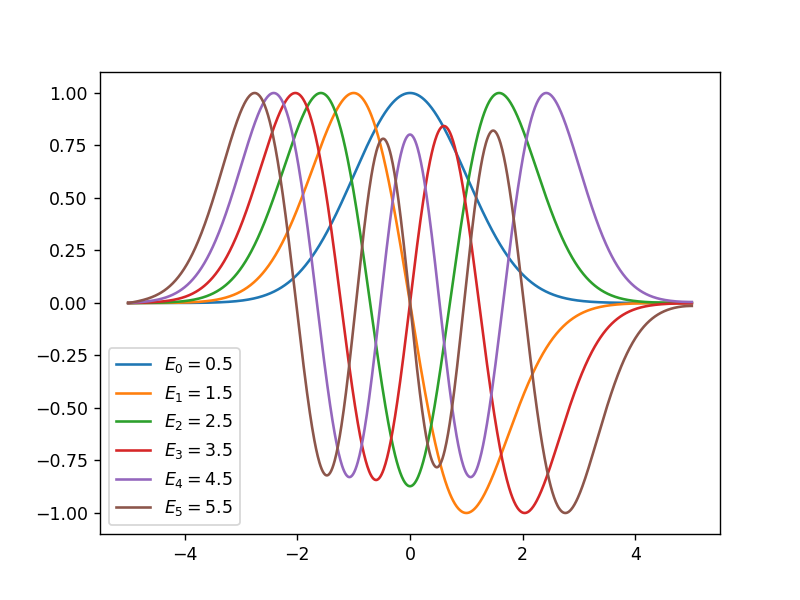

In [41]:
def R(x,E,V):
    return 2*(V(x)-E)

def Numerov(space,E,V):
    psi = np.zeros_like(space)
    psi[0] = 0
    psi[1] = 1e-5
    
    for i in range(len(space)-1):
        akp1 = 1-h**2/12 * R(space[i+1],E,V)
        akm1 = 1-h**2/12 * R(space[i-1],E,V)
        ak = 1+5*h**2/12 * R(space[i],E,V)
        if i >= 2:
            psi[i+1] = (2*ak*psi[i] - akm1*psi[i-1])/akp1
    return psi


def EigenEnergy(space,e,step,V):
    dE = 0.1
    listE = []
    E = e
    while len(listE) < 6:
        psik = Numerov(space,E,V)[-1]
        psik1 = Numerov(space,E+dE,V)[-1]
        if psik1*psik < 0:
            listE.append(E)
        E = E+dE
    return listE


E_ = EigenEnergy(x,0,0.001,V_harmonic)
Psi = [0]*len(E_)

for i in range(len(E_)):
    Psi[i] = Numerov(x,E_[i],V_harmonic)


def Normalize(psi):
    sqrd_psi = psi**2
    a = 1/np.sqrt(sci.integrate.simps(sqrd_psi))
    return a

for k in range(len(Psi)):
    Psi[k] = -Psi[k]/max(-Psi[k])
l = np.linspace(-3.5,3.5)
for i in range(len(E_)):
    plt.plot(x,Psi[i],label=r"$E_{%s} = %s$"%(i,round(E_[i],3)))
plt.legend()

---

**(i). Potencial gausiano:** con lo aprendido anteriormente, encuentre los primeros cinco estados ligados $(E_n <0)$ y los estados propios del operador de energía usando el potencial:
$$V(x) = -10e^{-x^2/20} \text{ con } -\infty < x < \infty.$$

$$E_n = [-9.51,-8.54,-7.62,-6.74,-5.89]$$

In [72]:
# Definición de una rutina para encontrar los valores propios de energía.
    
def EigenEnergy(space,e,step,V,n):
    E_list = []
    Psi_list = []
    Energies = np.arange(e,0,1e-2)
    print("Buscando eigenenergías:")
    for i, E in enumerate(Energies[:len(Energies)-2]):
        psik = Numerov(space,Energies[i],V)[-1]
        psikp1 = Numerov(space,Energies[i+1],V)[-1]
        
        if psik*psikp1 < 0:
            interval_E = np.linspace(Energies[i-1],Energies[i+1],n)
            statement = False
            
            for j in range(len(interval_E[:-1])):
                if Numerov(space,interval_E[j],V)[-1]*Numerov(space,interval_E[j+1],V)[-1] < 0 and not statement:
                    psi_inprove = Numerov(space,interval_E[j],V)
                    print("Found it!:",interval_E[j],psi_inprove[-1])
                    E_list.append(interval_E[j])
                    Psi_list.append(psi_inprove)
                    statement = True
                    
        if len(E_list) == 5:
            break
    return E_list,Psi_list      


def V_gaussian(x):
    return -10*np.exp(-x**2/20)

E_1,Psi1 = EigenEnergy(x,-10,-0.0001,V_gaussian,500)




Buscando eigenenergías:
Found it!: -9.50941883767536 -2.6844206034586473
Found it!: -8.547414829659349 0.0663228798985353
Found it!: -7.624288577154359 -0.002020479361664596
Found it!: -6.741082164328727 0.0002062422830676693
Found it!: -5.898416833667422 -2.0215271340805766e-05


<IPython.core.display.Javascript object>


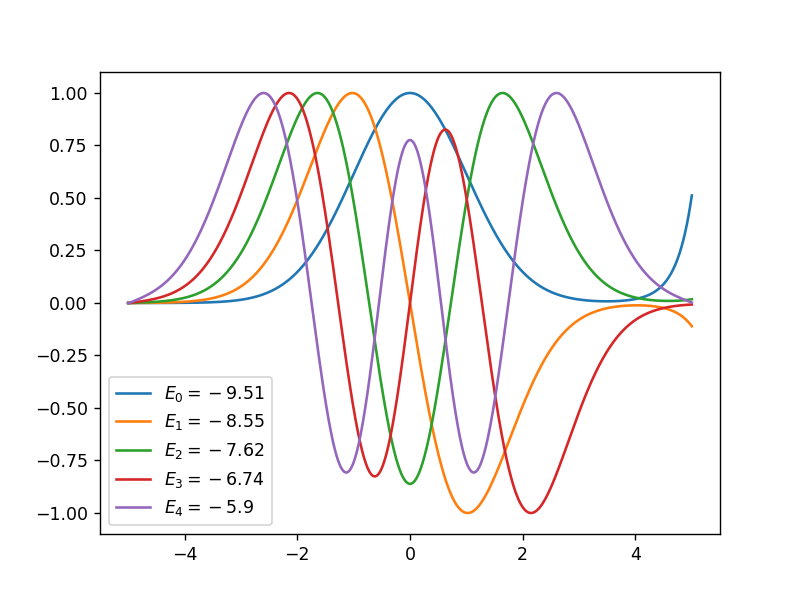

In [73]:
for k in range(len(Psi1)):
    Psi1[k] = -Psi1[k]/max(-Psi1[k])
for i in range(len(E_1)):
    plt.plot(x,Psi1[i],label=r"$E_{%s} = %s$"%(i,round(E_1[i],2)))
plt.legend()

---

**(j). Potencial racional:** Encuentre los dos estados ligados $(E_n <0)$ y los estados propios del operador de energía usando el potencial:

$$V(x) = \frac{4}{(1 + x^{2})^{2}} \ \text{ con } \ -\infty < x < \infty.$$

$$E_n = [−1.478, −0.163]$$

In [76]:
def V_sqrd(x):
    return -4/(1+x**2)**2

E_2,Psi2 = EigenEnergy(x,-3,-0.001,V_sqrd,6000)


Buscando eigenenergías:
Found it!: -2.471346891148536 -0.07731194545517414
Found it!: -0.4256109351559142 3.7579967393296e-06


<IPython.core.display.Javascript object>


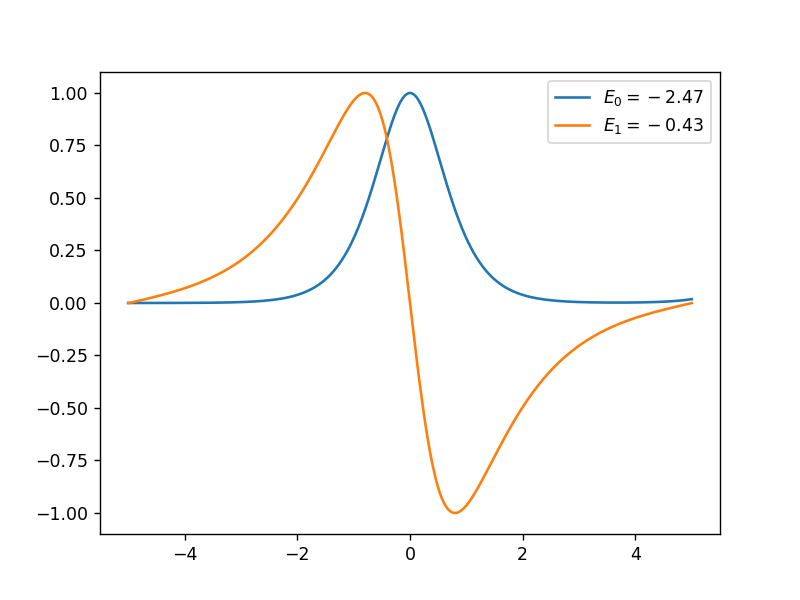

(array([-0.00000000e+00, -2.36709446e-06, -0.00000000e+00,  2.36709446e-06,
         4.73535841e-06,  7.10596190e-06,  9.48007606e-06,  1.18588737e-05,
         1.42435300e-05,  1.66352229e-05,  1.90351336e-05,  2.14444477e-05,
         2.38643551e-05,  2.62960509e-05,  2.87407362e-05,  3.11996181e-05,
         3.36739109e-05,  3.61648365e-05,  3.86736248e-05,  4.12015146e-05,
         4.37497540e-05,  4.63196010e-05,  4.89123244e-05,  5.15292041e-05,
         5.41715320e-05,  5.68406123e-05,  5.95377625e-05,  6.22643139e-05,
         6.50216122e-05,  6.78110181e-05,  7.06339083e-05,  7.34916758e-05,
         7.63857308e-05,  7.93175013e-05,  8.22884340e-05,  8.52999945e-05,
         8.83536687e-05,  9.14509632e-05,  9.45934058e-05,  9.77825466e-05,
         1.01019959e-04,  1.04307239e-04,  1.07646009e-04,  1.11037915e-04,
         1.14484630e-04,  1.17987853e-04,  1.21549313e-04,  1.25170765e-04,
         1.28853995e-04,  1.32600818e-04,  1.36413082e-04,  1.40292667e-04,
         1.4

In [78]:


for k in range(len(Psi2)):
    Psi2[k] = -Psi2[k]/max(-Psi2[k])

for i in range(len(E_2)):
    plt.plot(x,Psi2[i],label=r"$E_{%s} = %s$"%(i,round(E_2[i],2)))
plt.legend()

Psi2[0],Psi2[1]